In [1]:
from Mixer import *
import networkx as nx
import itertools
# from CayleyGraphs import *

import matplotlib.pyplot as plt

from matplotlib.lines import Line2D
cmap = plt.cm.coolwarm

# from pprint import pprint

# import random
# from random import sample
# # random.shuffle(B)
# # print(B)

In [2]:
B=["1010", "0111", "1110", "1001", "0010", "0000", "1101"]

In [3]:
def plotsolution(mixer,reduced, chain=False, rad=.6, plotall=False, dicke=True):
    if chain:
        if reduced:
            Gl=[mixer.solution_chain_reduced]
        else:
            Gl=[mixer.solution_chain]
    else:
        if reduced:
            Gl=mixer.solution_reduced
        else:
            Gl=mixer.solution
    nsol=len(Gl)
    print("number of solutions:", nsol)
    ns=len(Gl[0])
    
    gpos=(Gl[0][0].positions).copy()
    if dicke:
        for key in gpos:
            nones=len(key.replace("0", ""))
#             tmp=(gpos[key][0]).copy()
            gpos[key][1]=25*nones
#             gpos[key][0]=tmp
#     print(gpos)
    
    for isol in range(nsol):
        plt.figure(figsize=(26,26))
        custom_lines=[]
        colors=[]
        for i in range(ns):
            if ns==1:
                val=1
            else:
                val=i/(ns-1)
            custom_lines.append(Line2D([0], [0], color=cmap(val), lw=4))
            colors.append(cmap(val))   

        for i,g in enumerate(Gl[isol]):
            nx.draw_networkx_nodes(g.G, gpos, node_size=1000, node_color="white")
            nx.draw_networkx_labels(g.G, gpos, labels=g.labels)
            nx.draw_networkx_edges(g.G, gpos,connectionstyle="arc3,rad="+str(rad),edge_color=[colors[i]]*g.G.number_of_edges(),width=2,arrowsize=30,node_size=1000)
        plt.xlim([-.5,2**len(mixer.B[0].state)])

        legendstr=[]
        for g in Gl[isol]:
            if reduced:
                legendstr.append(str(g.Xl)+" "+str(g.PS_reduced)+" "+str(g.cost_reduced))
            else:
                legendstr.append(str(g.Xl)+" "+str(g.PS)+" "+str(g.cost))
        plt.legend(custom_lines, legendstr)
        if not plotall:
            break

computing family of graphs


100%|████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 26.75it/s]


commpairs= {'IIXI': [[0, 1]], 'IXXX': [[0, 2], [3, 6], [4, 5]], 'XIIX': [[0, 3], [2, 6]], 'XIXI': [[0, 4], [2, 5]], 'XXIX': [[0, 5], [2, 4]], 'XXXI': [[0, 6], [2, 3]], 'IXIX': [[1, 2]], 'XIXX': [[1, 3]], 'XIII': [[1, 4]], 'XXXX': [[1, 5]], 'XXII': [[1, 6]], 'IIXX': [[3, 4], [5, 6]], 'IXII': [[3, 5], [4, 6]]}
0 / 15 Number of combinations  15  choose  0 = 1.0


1it [00:00, 10407.70it/s]


1 / 15 Number of combinations  15  choose  1 = 15.0


15it [00:00, 40485.56it/s]


2 / 15 Number of combinations  15  choose  2 = 105.0


105it [00:00, 44710.85it/s]


3 / 15 Number of combinations  15  choose  3 = 455.0


455it [00:00, 18881.67it/s]


4 / 15 Number of combinations  15  choose  4 = 1365.0


1365it [00:00, 32881.67it/s]


IIXI [[1.0*IIII, 1.0*ZZII, 1.0*IZII, 1.0*ZIII], [1.0*IIII, 1.0*IIIZ, 1.0*ZIII, 1.0*ZIIZ]]
XIXI [[1.0*IIII, 1.0*ZZZI]]
IIXX [[-1.0*ZIII, 1.0*IIII], [-1.0*IIZZ, 1.0*ZIZZ]]
IXII [[-1.0*ZIII, 1.0*IIII]]
number of solutions: 2
cost= 22


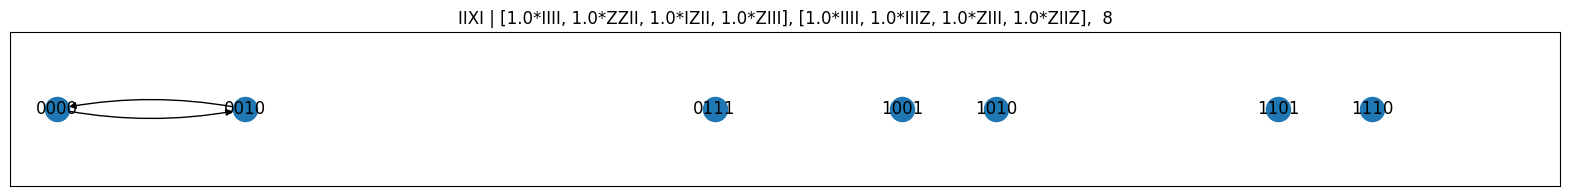

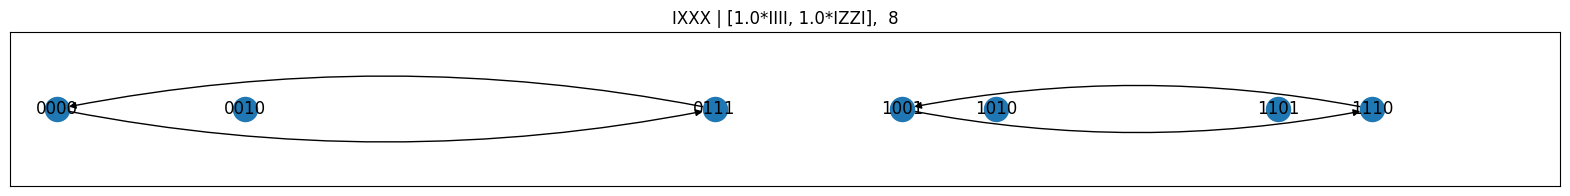

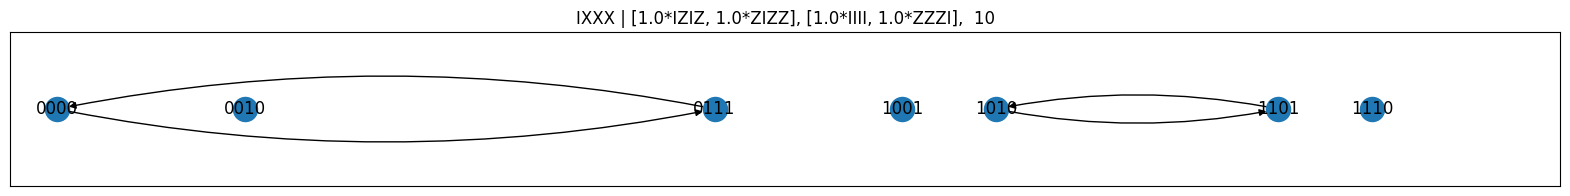

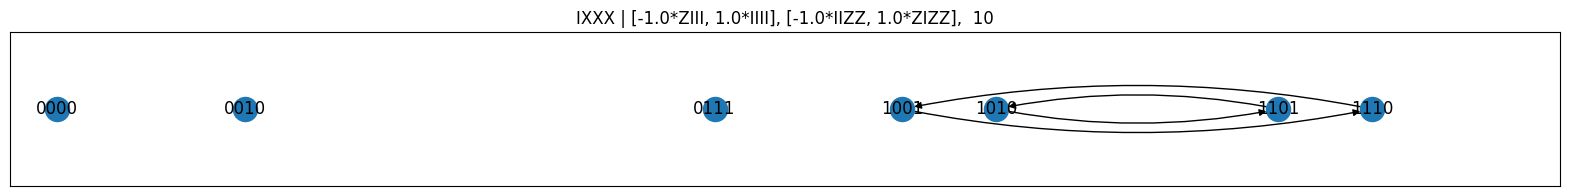

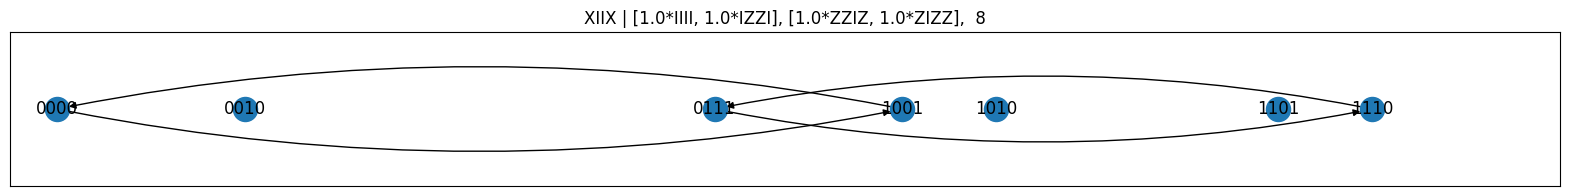

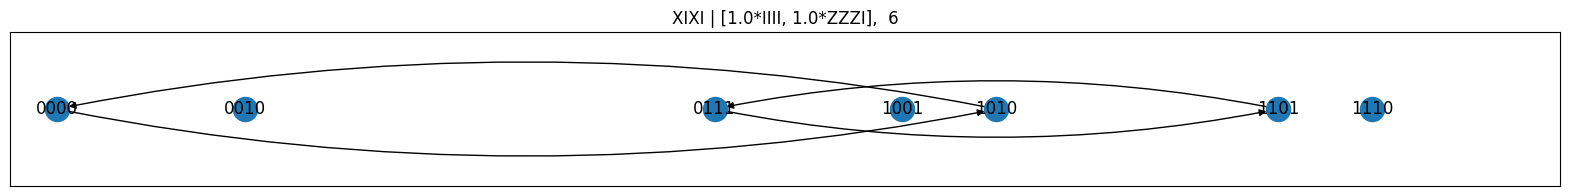

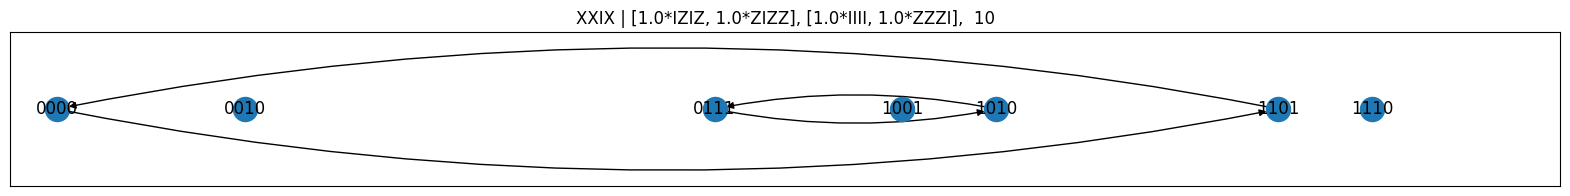

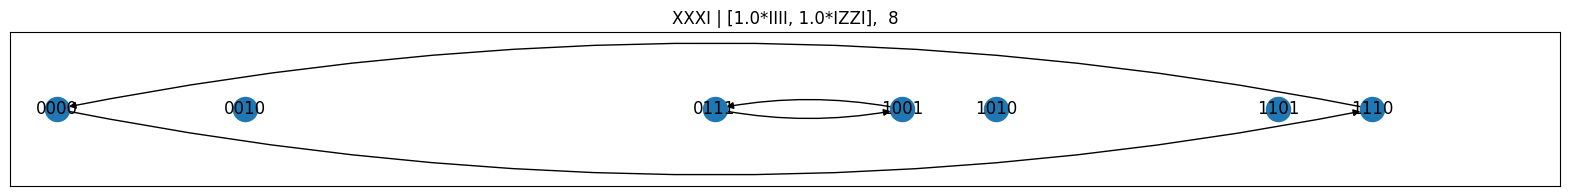

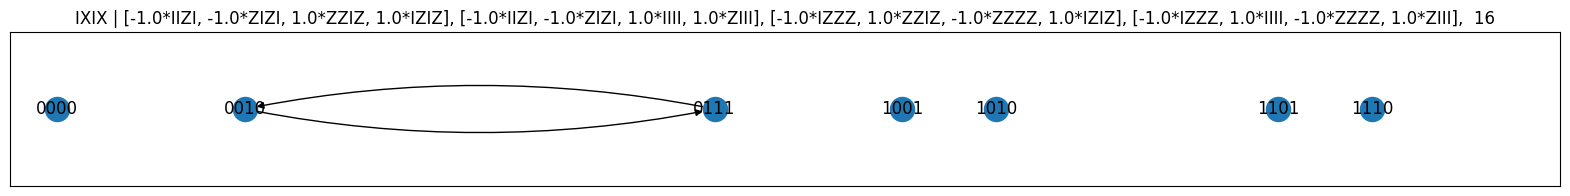

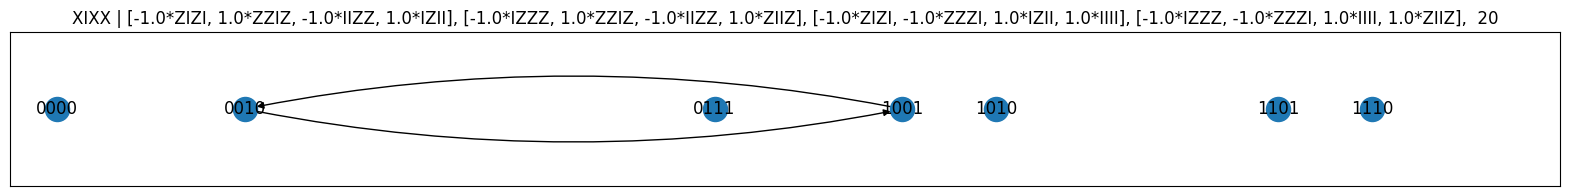

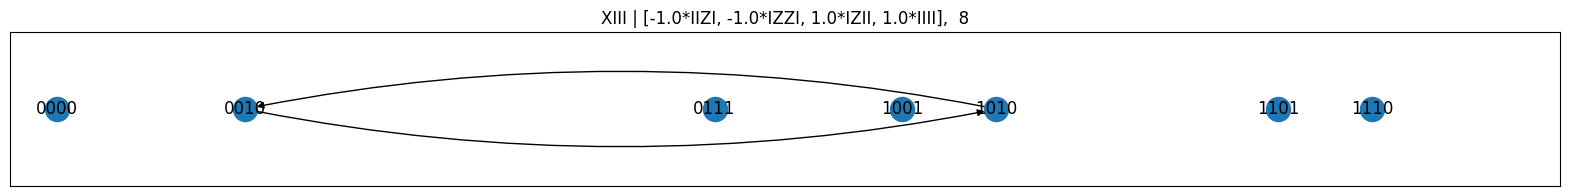

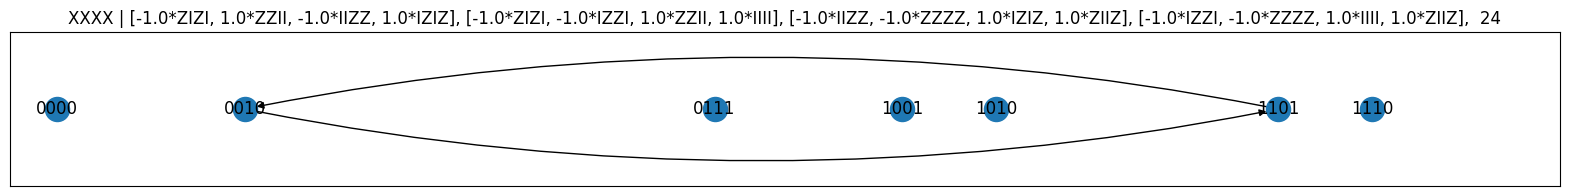

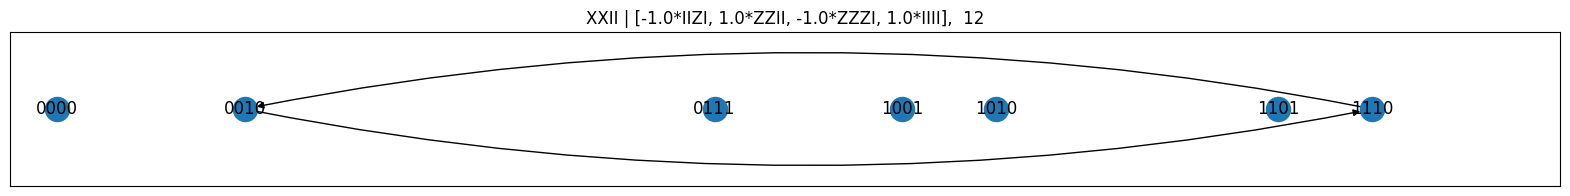

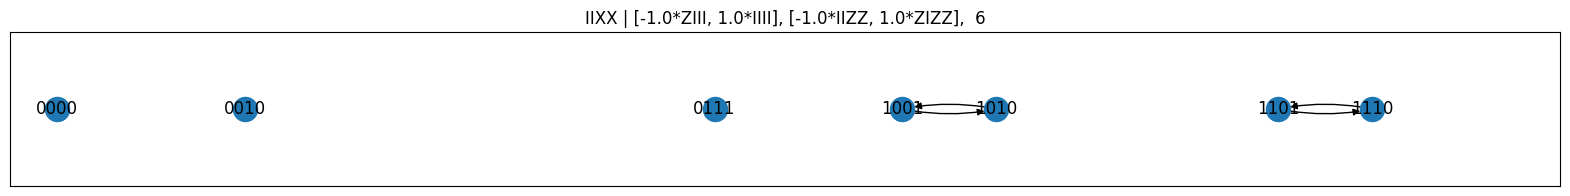

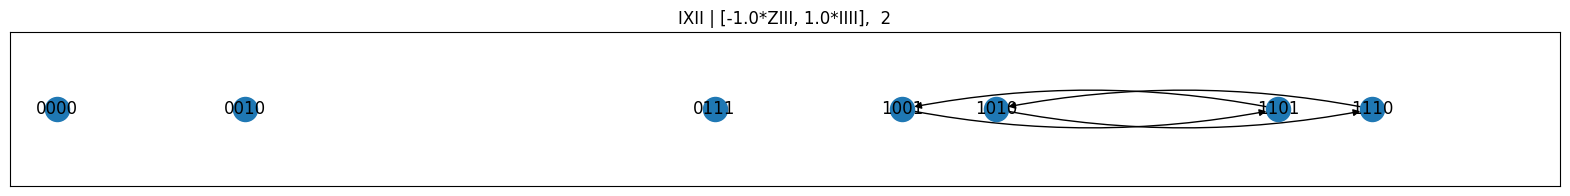

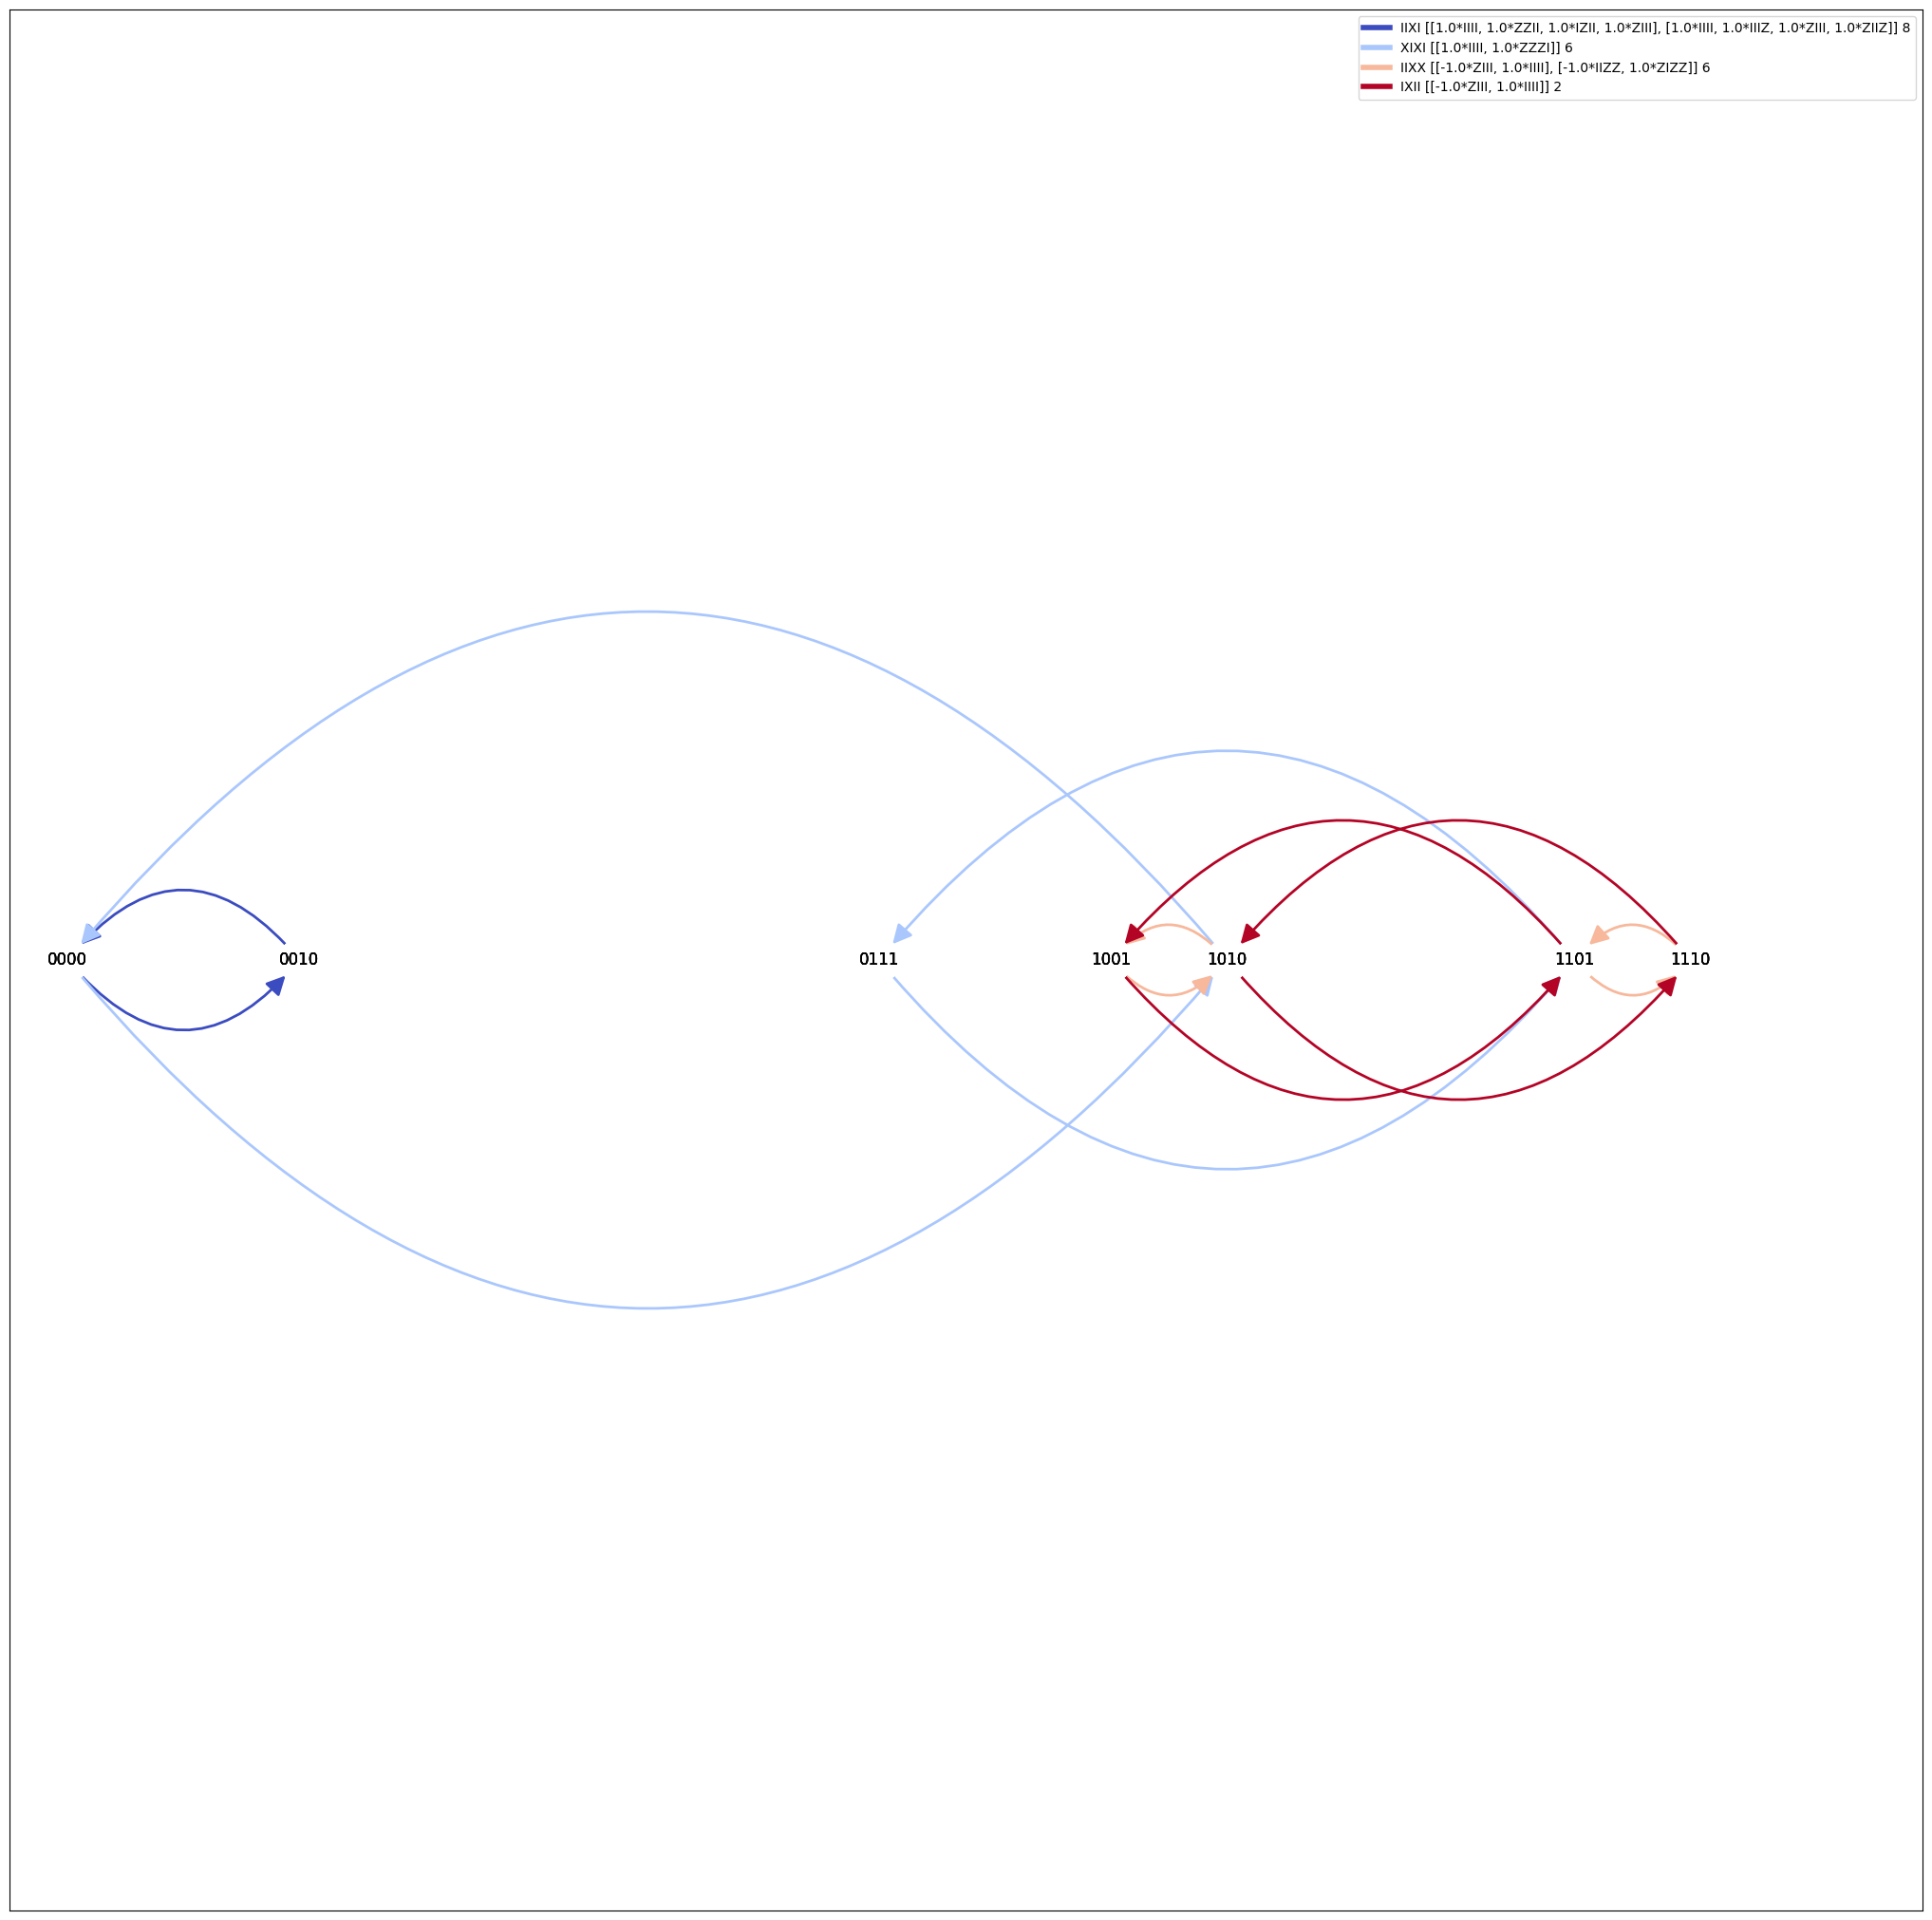

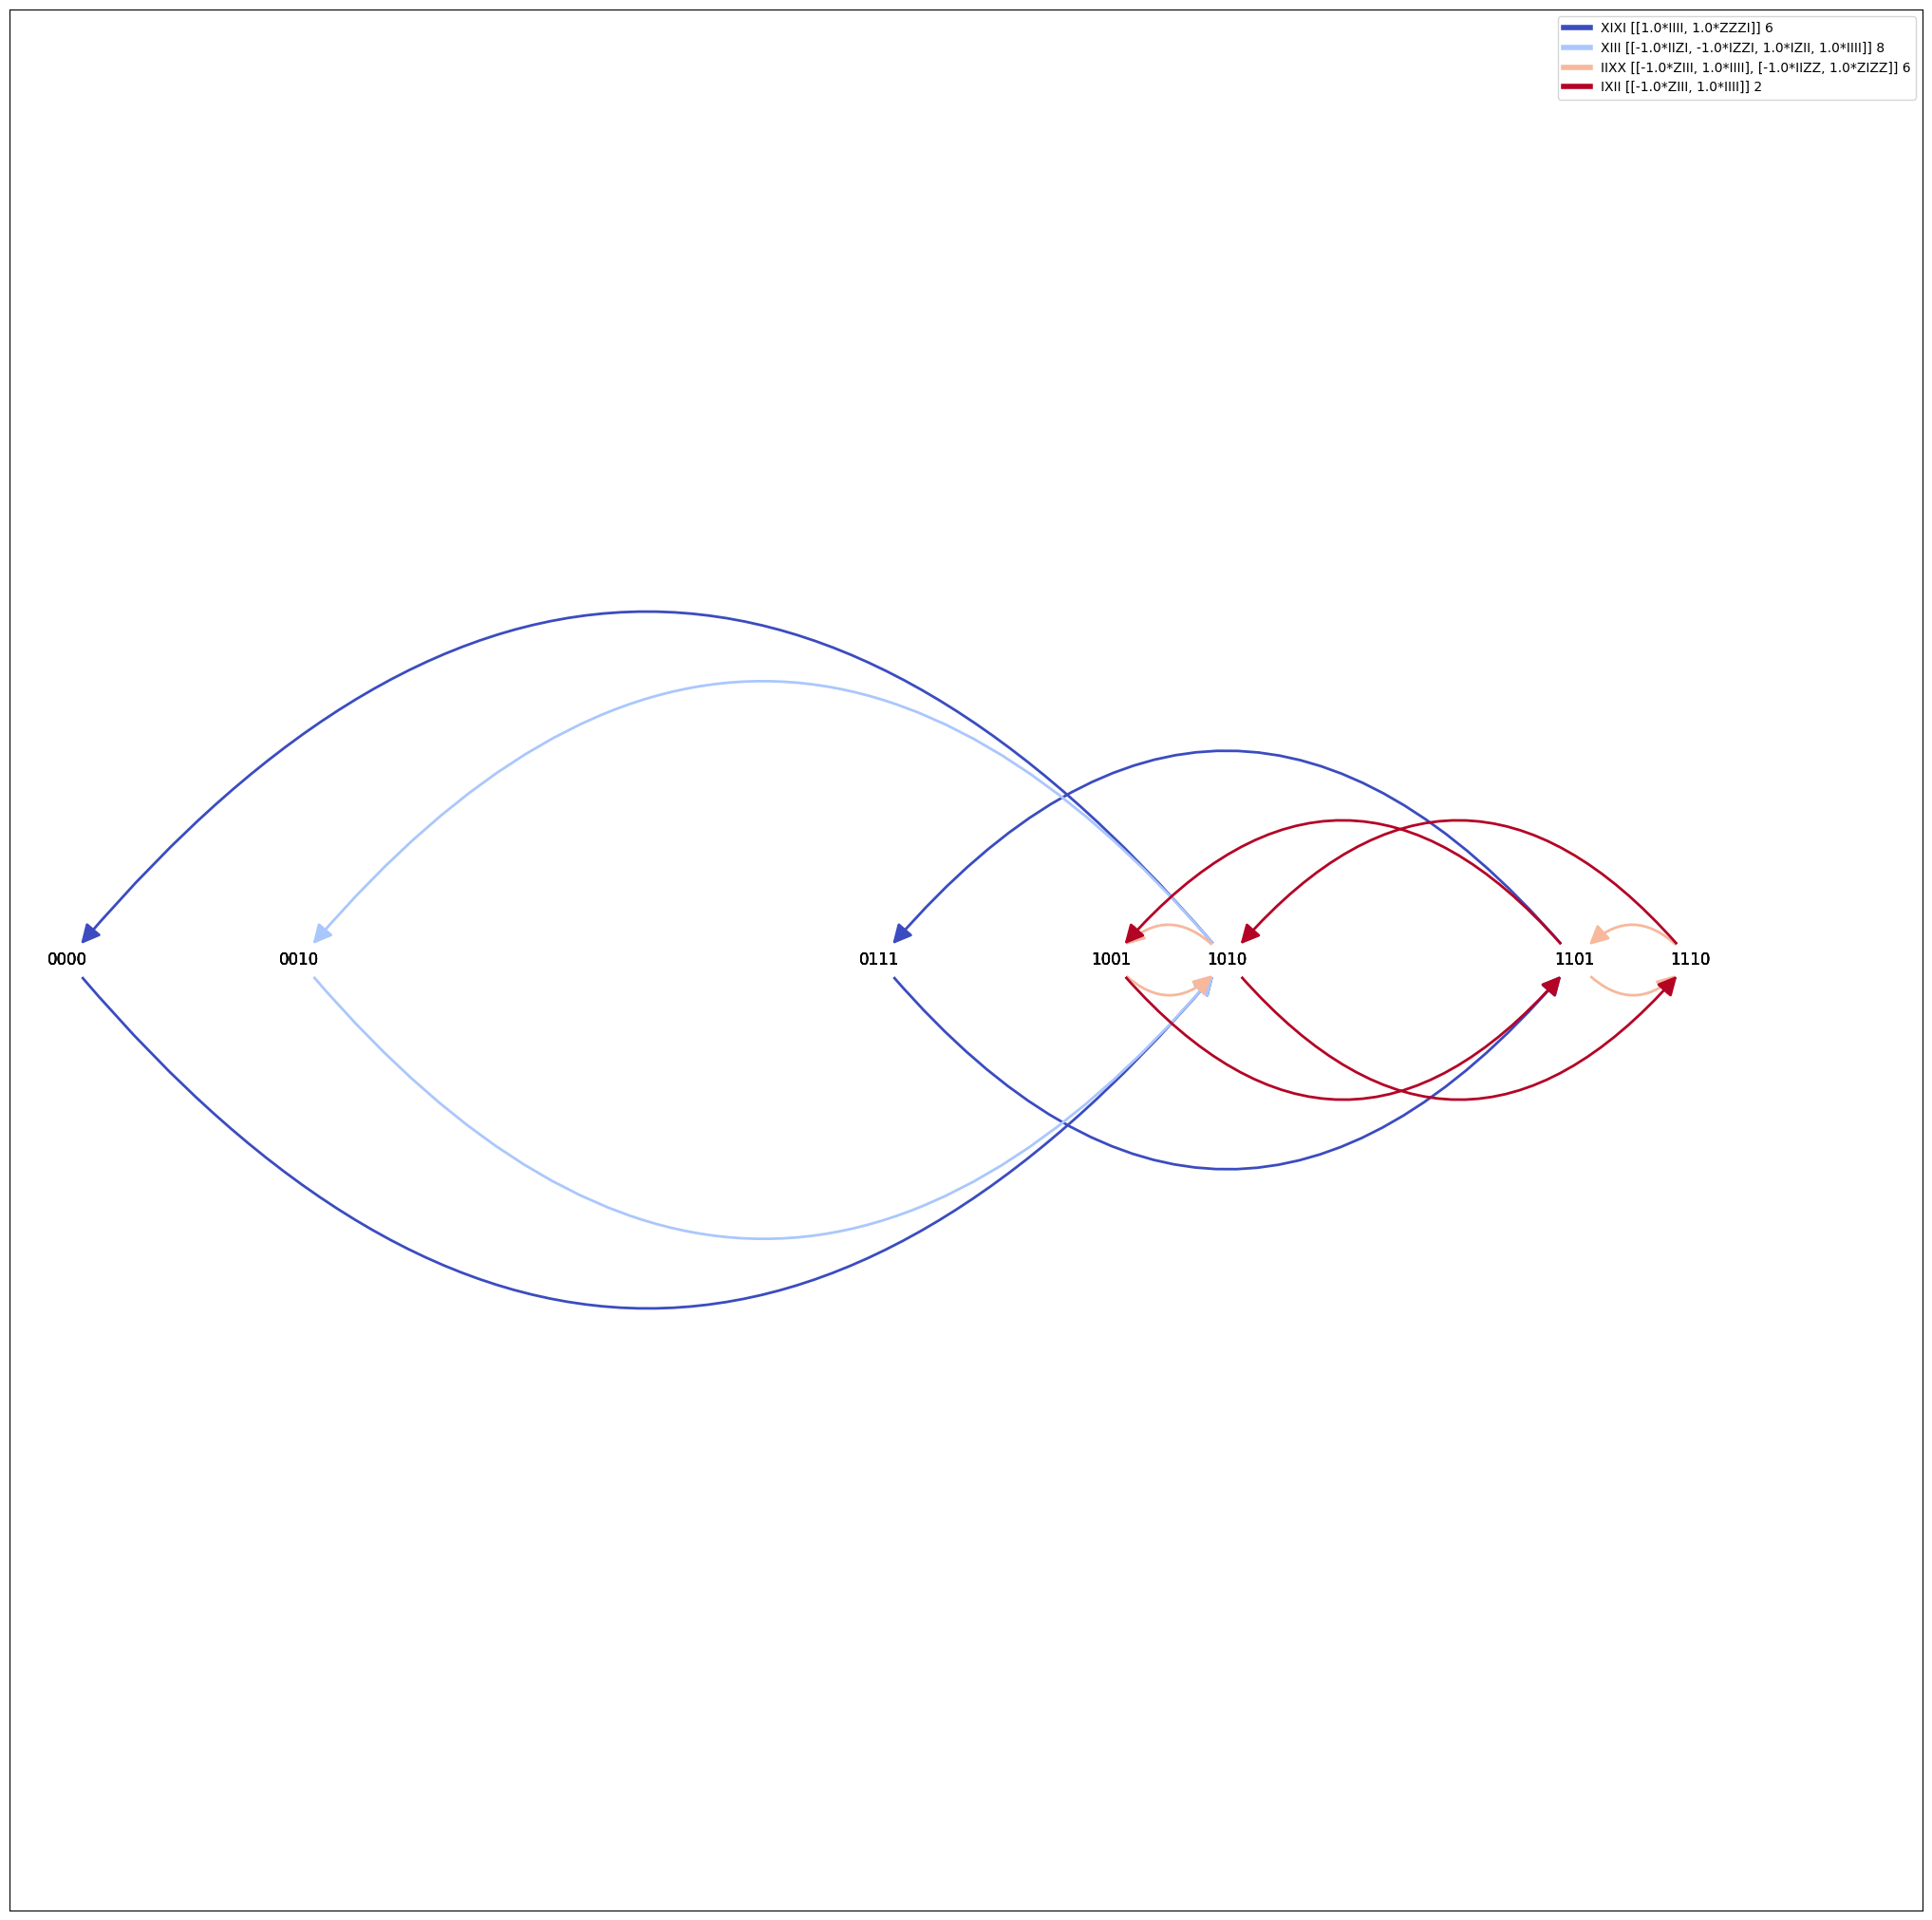

In [4]:
m=Mixer(B,digraph=True, reduced=True,sort=True)
print("commpairs=", m.commuting_pairs)

m.get_best_mixer_commuting_graphs()

for g in m.graph_family:
    plt.figure(figsize=(20,2))
    tmp=""
    for ps in g.PS_reduced:
        tmp+=str(ps)+", "
    plt.title(g.Xl+" | "+tmp+" "+str(g.cost_reduced))
    nx.draw_networkx_nodes(g.G, g.positions)
    nx.draw_networkx_labels(g.G, g.positions, labels=g.labels)
    nx.draw_networkx_edges(g.G, g.positions, connectionstyle="arc3,rad=0.1")
    plt.xlim([-.5,2**len(B[0])])

for g in m.solution_reduced[0]:
    print(g.Xl, g.PS_reduced)

plotsolution(m, True, plotall=True, dicke=False)
print("cost=",m.solution_reduced_cost)

In [5]:
def get_Dicke(n,l,k):
    ret = []
    for s in ["".join(i) for i in itertools.product("01", repeat=n)]:
        nones=len(s.replace("0", ""))
        if l<=nones<=k:
            ret.append(s)
    return ret


In [6]:
def get_XY_terms_chain(n):
    white=[]
    for i in range(1,n):
        tmp=""
        for j in range(i-1):
            tmp+="I"
        tmp+="XX"
        for j in range(i+1,n):
            tmp+="I"
        white.append(tmp)
    black = []
    for s in ["".join(i) for i in itertools.product("IX", repeat=n)]:
        nXs=len(s.replace("I", ""))
        if s not in white:
            if nXs==2 or nXs!=1:
                black.append(s)
    return white, black

In [7]:
n=5
B=get_Dicke(n,2,3)
white,black=get_XY_terms_chain(n)
print("white listed logical Xs:", white)
print("black listed logical Xs:", black)

white listed logical Xs: ['XXIII', 'IXXII', 'IIXXI', 'IIIXX']
black listed logical Xs: ['IIIII', 'IIXIX', 'IIXXX', 'IXIIX', 'IXIXI', 'IXIXX', 'IXXIX', 'IXXXI', 'IXXXX', 'XIIIX', 'XIIXI', 'XIIXX', 'XIXII', 'XIXIX', 'XIXXI', 'XIXXX', 'XXIIX', 'XXIXI', 'XXIXX', 'XXXII', 'XXXIX', 'XXXXI', 'XXXXX']


computing family of graphs


100%|████████████████████████████████████████████████████████████| 31/31 [00:04<00:00,  6.26it/s]


commpairs= {'IIXXI': [[0, 1], [5, 7], [6, 8], [11, 13], [12, 14], [18, 19]], 'IIXIX': [[0, 2], [4, 7], [6, 9], [10, 13], [12, 15], [17, 19]], 'IIXII': [[0, 3], [4, 8], [5, 9], [10, 14], [11, 15], [16, 19]], 'IXIXI': [[0, 4], [2, 7], [3, 8], [11, 16], [12, 17], [15, 19]], 'IXIIX': [[0, 5], [1, 7], [3, 9], [10, 16], [12, 18], [14, 19]], 'IXIII': [[0, 6], [1, 8], [2, 9], [10, 17], [11, 18], [13, 19]], 'IXXXX': [[0, 7], [1, 5], [2, 4], [12, 19], [14, 18], [15, 17]], 'IXXXI': [[0, 8], [1, 6], [3, 4], [11, 19], [13, 18], [15, 16]], 'IXXIX': [[0, 9], [2, 6], [3, 5], [10, 19], [13, 17], [14, 16]], 'XIIXI': [[0, 10], [2, 13], [3, 14], [5, 16], [6, 17], [9, 19]], 'XIIIX': [[0, 11], [1, 13], [3, 15], [4, 16], [6, 18], [8, 19]], 'XIIII': [[0, 12], [1, 14], [2, 15], [4, 17], [5, 18], [7, 19]], 'XIXXX': [[0, 13], [1, 11], [2, 10], [6, 19], [8, 18], [9, 17]], 'XIXXI': [[0, 14], [1, 12], [3, 10], [5, 19], [7, 18], [9, 16]], 'XIXIX': [[0, 15], [2, 12], [3, 11], [4, 19], [7, 17], [8, 16]], 'XXIXX': [[0,

1it [00:00, 18641.35it/s]


1 / 31 Number of combinations  31  choose  1 = 31.0


31it [00:00, 52577.20it/s]


2 / 31 Number of combinations  31  choose  2 = 465.0


465it [00:00, 42274.88it/s]


3 / 31 Number of combinations  31  choose  3 = 4495.0


4495it [00:00, 14684.20it/s]


4 / 31 Number of combinations  31  choose  4 = 31465.0


31465it [00:18, 1665.66it/s]


5 / 31 Number of combinations  31  choose  5 = 169911.0


169911it [00:10, 16892.61it/s]


IIXXI [[0.375*IIIII, -0.375*IIZZI]]
IIXIX [[0.375*IIIII, -0.375*IIZIZ]]
IIXII [[0.375*IIIII, 0.375*ZZIZZ], [-0.125*IZIZI, -0.125*ZIIIZ], [-0.125*IZIIZ, -0.125*ZIIZI], [-0.125*IIIZZ, -0.125*ZZIII]]
IXIXI [[0.375*IIIII, -0.375*IZIZI]]
XIIXI [[0.375*IIIII, -0.375*ZIIZI]]
number of solutions: 750
cost= 24


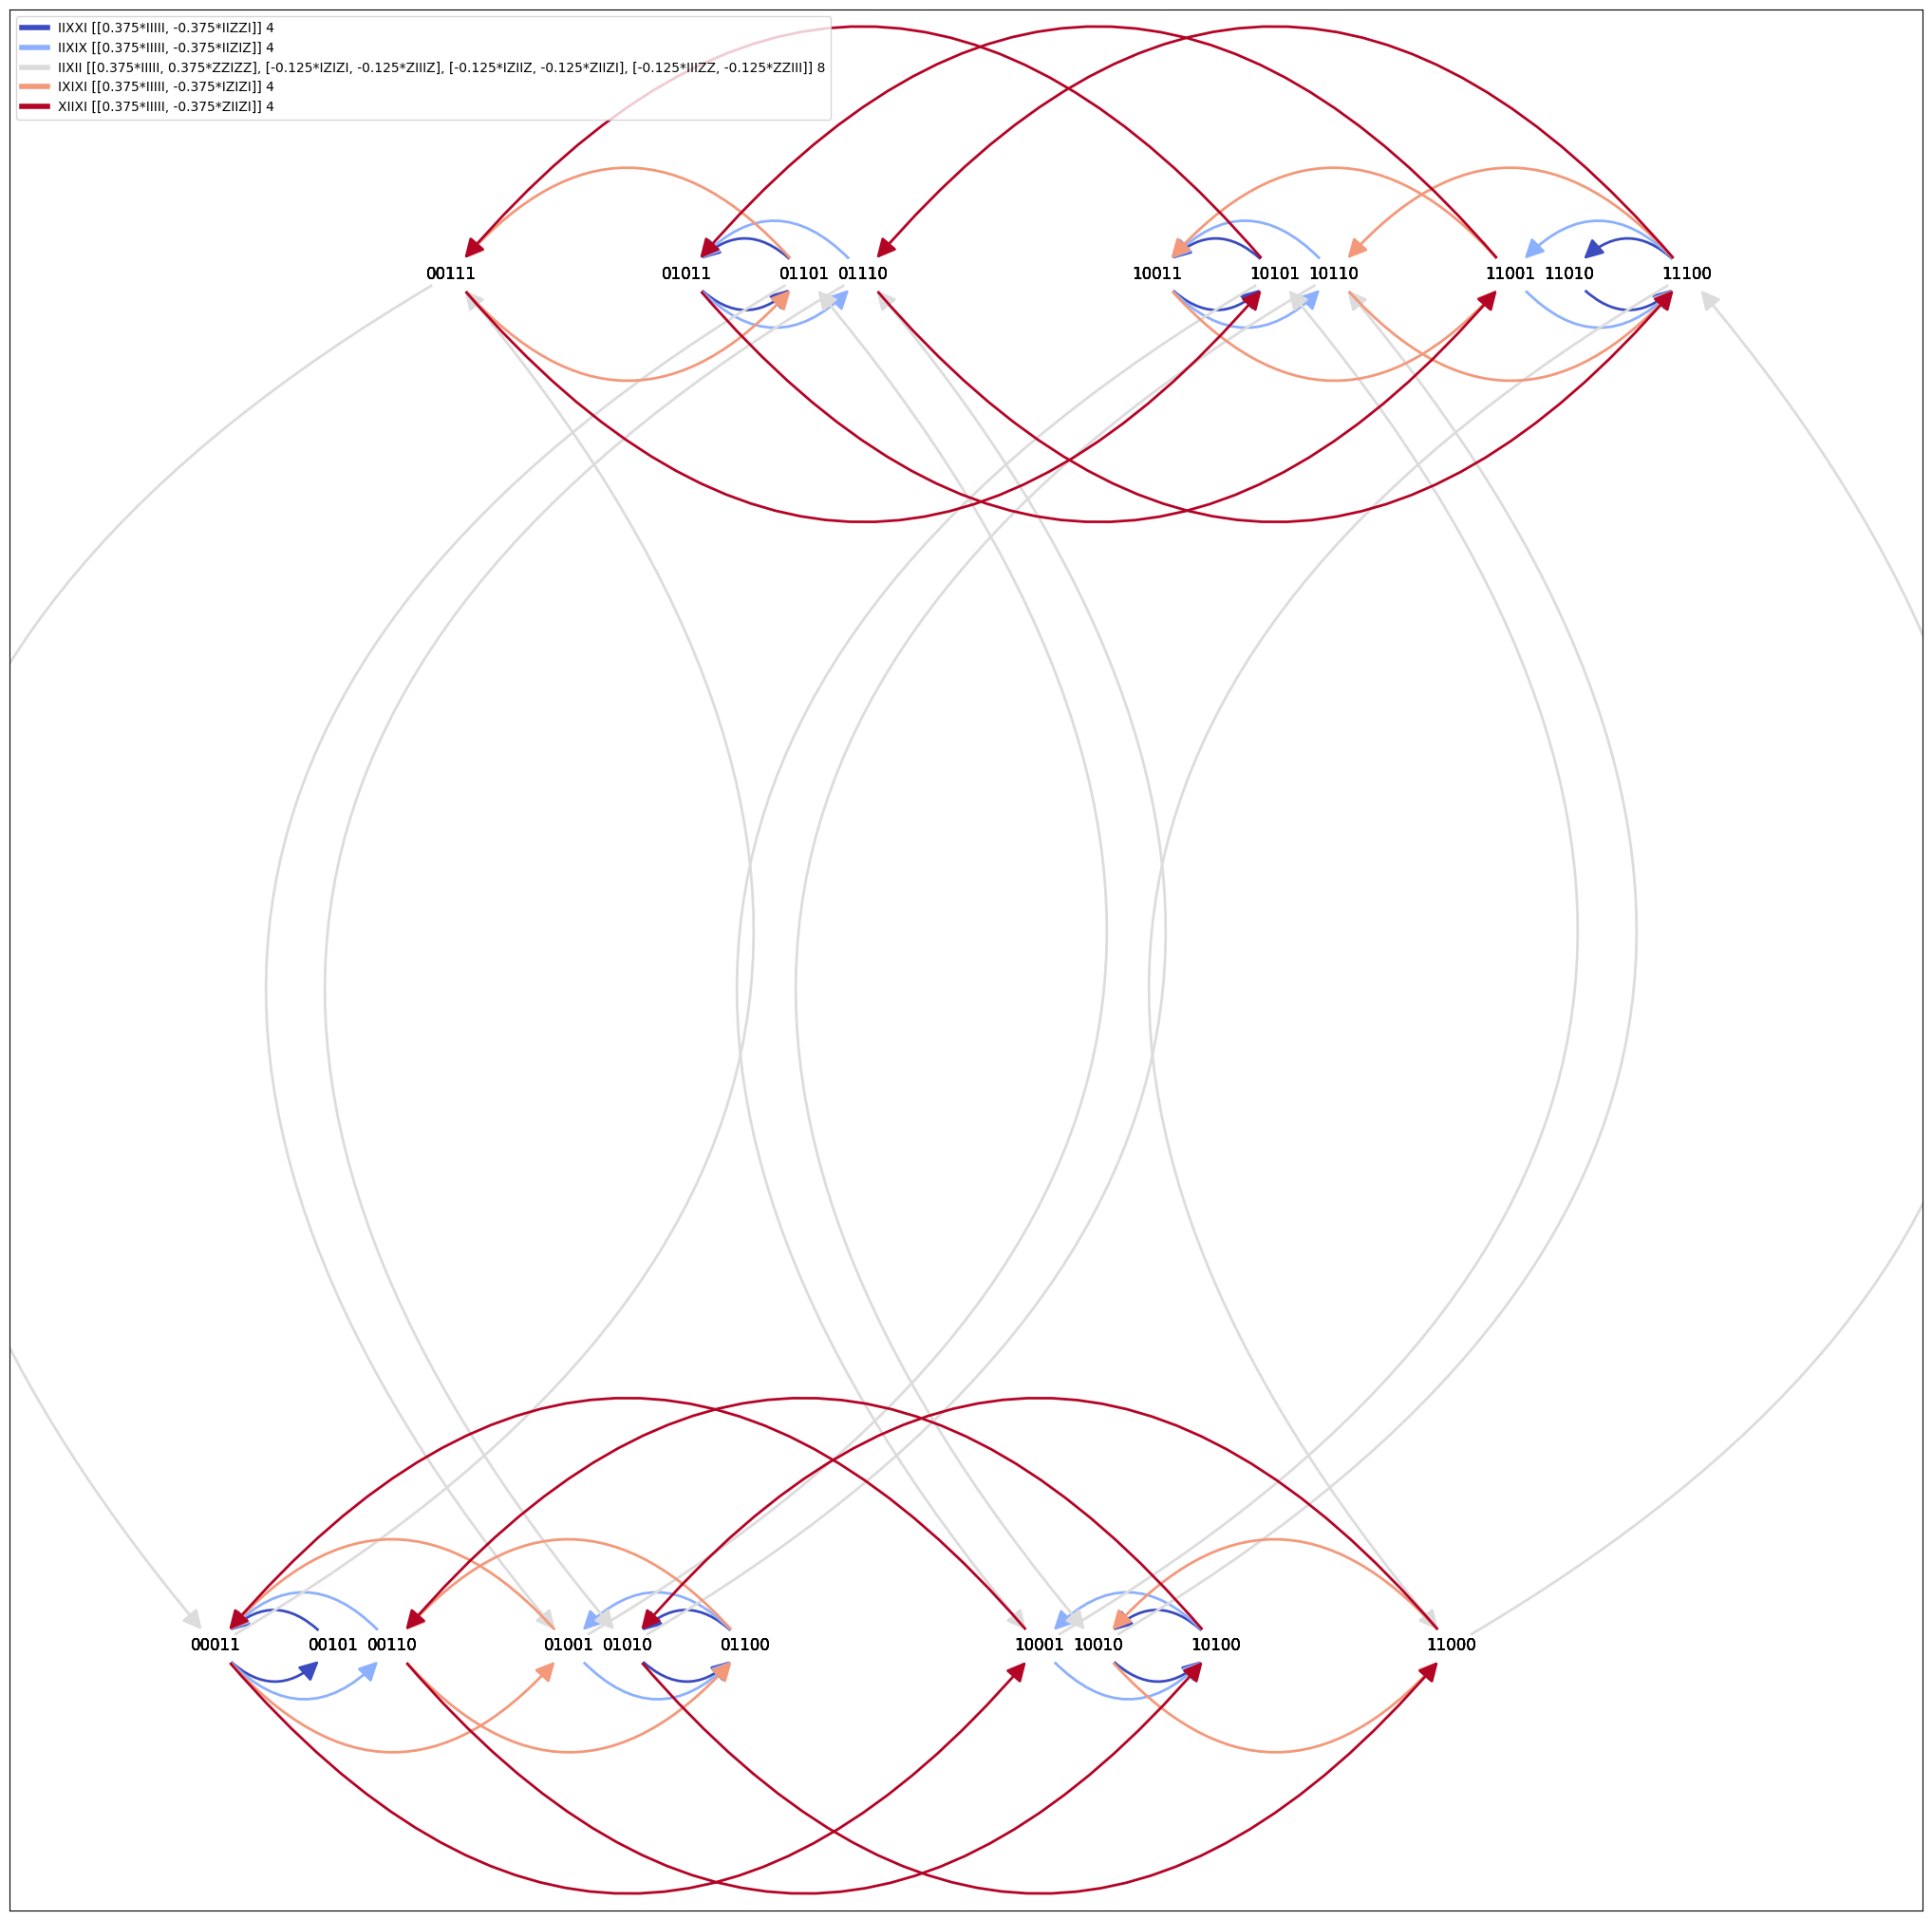

In [8]:
m=Mixer(B,digraph=True, reduced=True,sort=True)
print("commpairs=", m.commuting_pairs)

m.get_best_mixer_commuting_graphs()

for g in m.solution_reduced[0]:
    print(g.Xl, g.PS_reduced)

plotsolution(m, True, plotall=False, dicke=True)
print("cost=",m.solution_reduced_cost)